# [Project Title]

In this project, my goal is XYZ.

The data I am using is XYZ (EX: the [Mushroom dataset](https://archive.ics.uci.edu/dataset/73/mushroom) from the UCI Machine Learning Repository. The dataset has 8,124 observations with 22 features, was created in 1987, and last updated on August 10, 2023. Each row in the dataset represents an observation of one mushroom from one of 23 species of gilled mushrooms in the Agaricus and Lepiota Family, along with corresponding characteristics sush as shape, color, habitat, etc. that can be used to predict its edibility.)

## Step 1: Imports and Loading Data
### Import Packages

This project requires the following packages.

In [58]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Load the Datasets

Load in the data sets and check the shape of each.

In [59]:
# Load datasets
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
stores = pd.read_csv("Data/stores.csv")
oil = pd.read_csv("Data/oil.csv")
holidays = pd.read_csv("Data/holidays_events.csv")
transactions = pd.read_csv("Data/transactions.csv")
sample = pd.read_csv("Data/sample_submission.csv")

# Convert the date column to datetime in train, test, oil, and holidays datasets
train["date"] = pd.to_datetime(train["date"], format="%Y-%m-%d", errors="raise")
test["date"] = pd.to_datetime(test["date"], format="%Y-%m-%d", errors="raise")
oil["date"] = pd.to_datetime(oil["date"], format="%Y-%m-%d", errors="raise")
holidays["date"] = pd.to_datetime(holidays["date"], format="%Y-%m-%d", errors="raise")

# Sanity Check
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Stores shape:", stores.shape)
print("Oil shape:", oil.shape)
print("Holidays shape:", holidays.shape)
print("Transactions shape:", transactions.shape)
print("Sample Submission shape:", sample.shape)


Train shape: (3000888, 6)
Test shape: (28512, 5)
Stores shape: (54, 5)
Oil shape: (1218, 2)
Holidays shape: (350, 6)
Transactions shape: (83488, 3)
Sample Submission shape: (28512, 2)


## Step 2: Exploratory Data Analysis
### View the Data

Lets start by looking at the top of the train and test data sets to get a better understanding of what we are working with.

In [60]:
print("\nTraining data:")
print(train.head())

print("\nTest data:")
print(test.head())

print("\nTraioning data types:")
print(train.dtypes)

n_families = train["family"].nunique()
print("Number of families:", n_families)


Training data:
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

Test data:
        id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

Traioning data types:
id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object
Number of families: 33


As you can see above, all columns are numerical except date and family. Family tells us the type of product sold, and it seems like there are 33 different product families. Now let's continue with visualizing the data.

### Graph the Data

Let's graph the different data sets to further improve our understanding of the data.

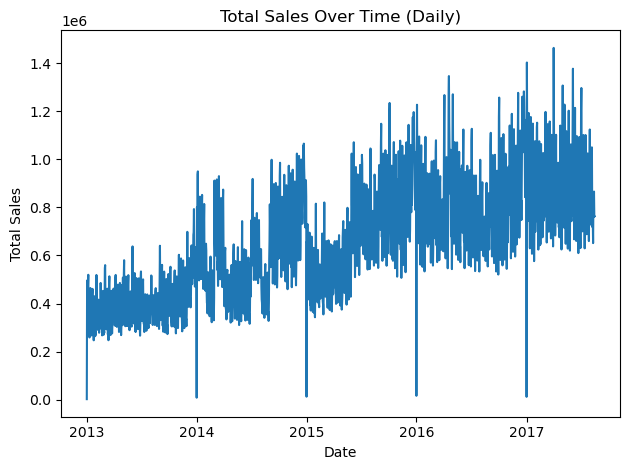

In [61]:
# Group the sales by date
daily = (train.groupby("date", as_index=False)["sales"].sum()
         .sort_values("date"))

# Graph the sales over time
plt.figure()
plt.plot(daily["date"], daily["sales"])
plt.title("Total Sales Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Total Sales")

# Modify x-axis for better readability
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.tight_layout()
plt.show()

It looks like there is an increasing trend in sales over the 4 years we observe in the data. We also see a drop in sales at the start/end of every year. This is likely due to the stores being closed for Christmas and New Years, but we can confirm that using the holidays data.

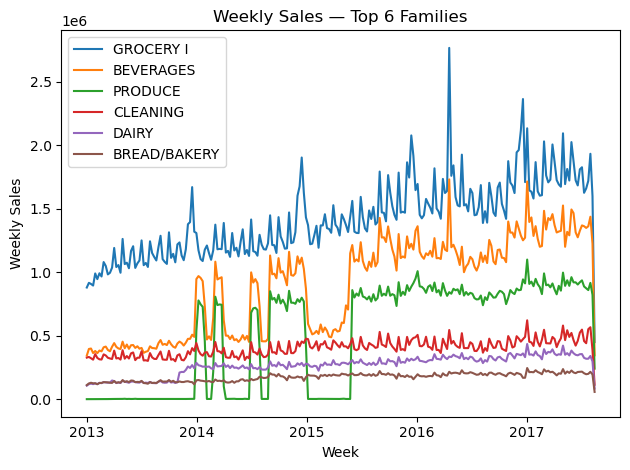

In [62]:
# Group sales data by week and family, summing sales within each week
weekly = (
    train.assign(week=train["date"].dt.to_period("W").dt.start_time)
            .groupby(["week", "family"], as_index=False)["sales"]
            .sum()
)

# Identify the top 6 product families by total sales
top_families = (
    train.groupby("family")["sales"]
            .sum()
            .sort_values(ascending=False)
            .head(6)
            .index
            .tolist()
)

# Graph the weekly sales for the top 6 product families
plt.figure()
for fam in top_families:
    s = weekly[weekly["family"] == fam].sort_values("week")
    plt.plot(s["week"], s["sales"], label=fam)
plt.title("Weekly Sales — Top 6 Families")
plt.xlabel("Week")
plt.ylabel("Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()

It looks like Grocery is the highest selling product family, followed by Beverages and Produce. The beverage and produce families appear to have large spikes/dips from 2014 to mid-2016.

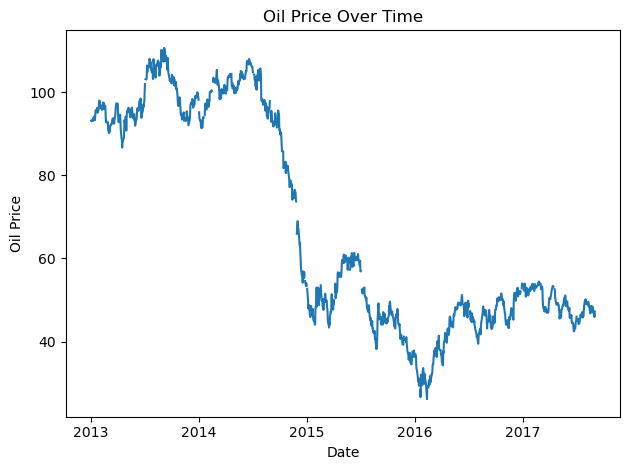

In [63]:
# Graph the oil price over time
plt.figure()
plt.plot(oil["date"], oil["dcoilwtico"])
plt.title("Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Oil Price")

# Modify x-axis for better readability
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.tight_layout()
plt.show()


As stated in the project brief, Ecuador is an oil-dependent country and is very sensitive to oil price shocks. With this in mind, the fall in oil prices in Mid-2014 to 2015 should have had a positive effect on sales, since cheaper oil usually equates to cheaper goods and more spending money.